In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("base_datos/covid_19_data.csv")
df.head()
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')>

In [4]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [5]:
df_1=df.copy()

In [6]:
df_1=df[['ObservationDate',
'Country/Region',
'Confirmed',
'Deaths',
'Recovered']]

Al usar df.groupby(['ObservationDate']).sum() se tiene que se agruparan las variables en relacion a la columna de tiempo y se sumaran todas las ocurrencias.

In [7]:
df_time=df_1.groupby(['ObservationDate']).sum()


In [8]:
df1=df_time["Confirmed"].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [9]:
df2=df_time["Confirmed"].iloc[12:17]
df2

ObservationDate
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
2020-02-06    30818.0
2020-02-07    34392.0
Name: Confirmed, dtype: float64

In [10]:
df1-df2

ObservationDate
2020-02-01    NaN
2020-02-02    NaN
2020-02-03    0.0
2020-02-04    0.0
2020-02-05    0.0
2020-02-06    NaN
2020-02-07    NaN
Name: Confirmed, dtype: float64

In [11]:
primera_observacion=df_time.iloc[:1]
primera_observacion

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0


In [12]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [13]:
df_diff=df_time.diff()
df_diff.iloc[:1]=primera_observacion


In [14]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [15]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [16]:
df_diff.resample("7D").apply(lambda x : sum(x))

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


# Tratar variables nulas en una serie de tiempo

In [17]:
df_cum=df_time.resample("12h").sum(min_count=1)

In [18]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [25]:
df_cum.interpolate(inplace = True)

In [26]:
df_cum["rate"]= 1- df_cum["Deaths"]/df_cum["Confirmed"]

In [ ]:
df_cum=df_cum.reset_index()


In [39]:
df_cum.drop(["index","level_0"],inplace=True,axis=1)

In [45]:
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


Estudiemos ahora el caso en que la variable tiempo no es un indice sino que es solomente una columna mas

In [49]:
df_cum.groupby(pd.Grouper(key="ObservationDate",freq="M"))[["rate"]].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


In [52]:
sr=df_cum.groupby(pd.Grouper(key="ObservationDate",freq="1D"))["rate"].mean()

<AxesSubplot:xlabel='ObservationDate'>

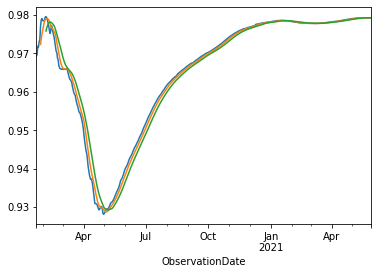

In [64]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=15).mean().plot()